## 参考文献

 - ~~[はじめてのニューラルネットワーク：分類問題の初歩  |  TensorFlow Core](https://www.tensorflow.org/tutorials/keras/classification?hl=ja)~~
 - [Image classification  |  TensorFlow Core]( https://www.tensorflow.org/tutorials/images/classification?hl=ja)

## 実装

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

import os
import numpy as np
import matplotlib.pyplot as plt

### データセットの読み込み

In [ ]:
import pandas as pd


class LocalDataSetRepository:
    
    def get(name: str) -> pd.DataFrame:
    
    def save(dataset: pd.DataFrame) -> None:
        

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 223s 3us/step


In [5]:
print(PATH)

/Users/taiyou/.keras/datasets/cats_and_dogs_filtered


In [8]:
!ls /Users/taiyou/.keras/datasets/cats_and_dogs_filtered

train        validation   vectorize.py


In [11]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [14]:
train_cats_dir = os.path.join(train_dir, 'cats')  # 学習用の猫画像のディレクトリ
train_dogs_dir = os.path.join(train_dir, 'dogs')  # 学習用の犬画像のディレクトリ
validation_cats_dir = os.path.join(validation_dir, 'cats')  # 検証用の猫画像のディレクトリ
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # 検証用の犬画像のディレクトリ

In [15]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [23]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


### 学習

In [38]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ
validation_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ

In [50]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size, directory=train_dir, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')

Found 2000 images belonging to 2 classes.


In [51]:
val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size, directory=validation_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')

Found 1000 images belonging to 2 classes.


In [30]:
sample_training_images, _ = next(train_data_gen)

In [29]:
# この関数は、1行5列のグリッド形式で画像をプロットし、画像は各列に配置されます。
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

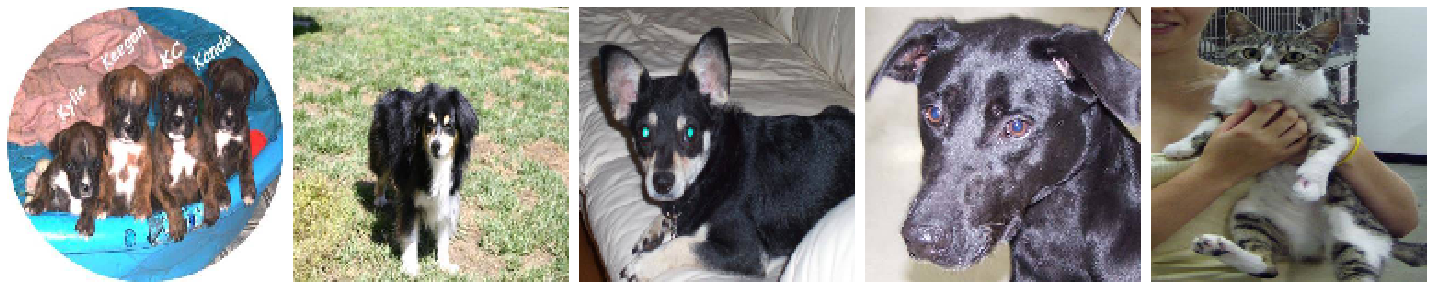

In [31]:
plotImages(sample_training_images[:5])

In [56]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),  # 畳込み層(入力層)
    MaxPooling2D(),  # プーリング層
    Conv2D(32, 3, padding='same', activation='relu'),  # 畳込み層
    MaxPooling2D(),  # プーリング層
    Conv2D(64, 3, padding='same', activation='relu'),  # 畳込み層
    MaxPooling2D(),  # プーリング層
    Flatten(),  # 全結合層
    Dense(512, activation='relu'),  # 全結合層
    Dense(1, activation='sigmoid')  # 全結合層(出力層)
])

In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [64]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 70s 5s/step - loss: 0.8360 - accuracy: 0.4920 - val_loss: 0.6920 - val_accuracy: 0.5234
Epoch 2/15
15/15 [==============================] - 59s 4s/step - loss: 0.6827 - accuracy: 0.5780 - val_loss: 0.6632 - val_accuracy: 0.5781
Epoch 3/15
15/15 [==============================] - 54s 4s/step - loss: 0.6362 - accuracy: 0.6277 - val_loss: 0.6690 - val_accuracy: 0.5502
Epoch 4/15
15/15 [==============================] - 51s 3s/step - loss: 0.6419 - accuracy: 0.6375 - val_loss: 0.6003 - val_accuracy: 0.6797
Epoch 5/15
15/15 [==============================] - 50s 3s/step - loss: 0.5631 - accuracy: 0.7062 - val_loss: 0.5595 - val_accuracy: 0.7165
Epoch 6/15
15/15 [==============================] - 48s 3s/step - loss: 0.5065 - accuracy: 0.7533 - val_loss: 0.5633 - val_accuracy: 0.6931
Epoch 7/15
15/15 [==============================] - 49s 3s/step - loss: 0.4638 - accuracy: 0.7767 - val_loss: 0.5489 - val_accuracy: 0.7277
Epoch 8/15
15/15 [==

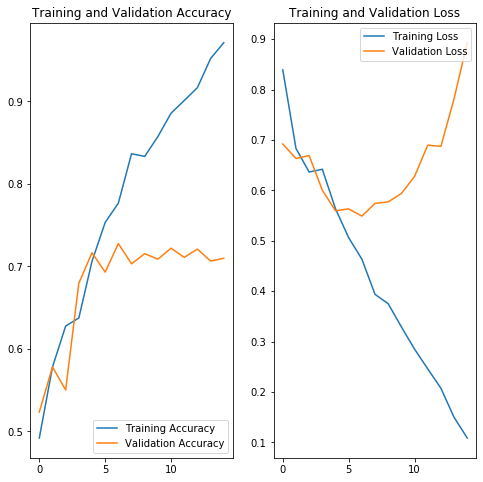

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()